In [1]:
import numpy as np
import pandas as pd

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy

In [4]:
data = pd.read_csv('gbm-data.csv').values

Разбейте выборку
на обучающую и тестовую, используя функцию train_test_split с
параметрами test_size = 0.8 и random_state = 241

In [13]:
from sklearn.model_selection import train_test_split


y = data[:, 0]
X = data[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=241)


Обучите GradientBoostingClassifier с параметрами n_estimators=250,
verbose=True, random_state=241 и для каждого значения learning_rate
из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
1. Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой
итерации.
2. Преобразуйте полученное предсказание по формуле 1 / (
1+e
^−y_pred) ,
где y_pred — предсказанное значение.
3. Вычислите и постройте график значений log-loss на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается

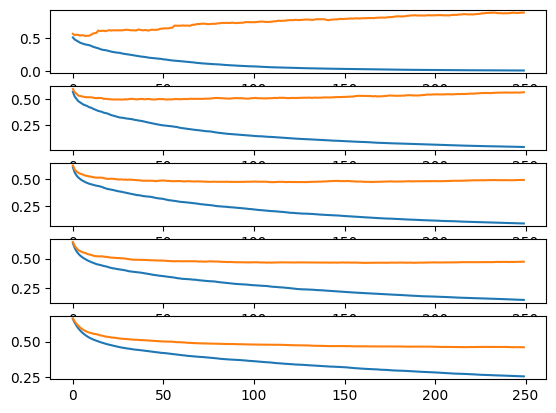

In [30]:
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss


fig, ax = plt.subplots(5)

min_score = 0
min_iter = 0

lrs = [1, 0.5, 0.3, 0.2, 0.1]

for i in range(len(lrs)):
    lr = lrs[i]
    model = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=lr)
    model.fit(X_train, y_train)
    train_pred = model.staged_decision_function(X_train)
    test_pred = model.staged_decision_function(X_test)

    train_pred_transformed = [1 / (1 + np.exp(-y_pred)) for y_pred in train_pred]
    test_pred_transformed = [1 / (1 + np.exp(-y_pred)) for y_pred in test_pred]

    train_loss = [log_loss(y_train, pred) for pred in train_pred_transformed]
    test_loss = [log_loss(y_test, pred) for pred in test_pred_transformed]

    ax[i].plot(range(250), train_loss)
    ax[i].plot(range(250), test_loss)

    if lr == 0.2:
        min_score = min(test_loss)
        min_iter = np.argmin(np.array(test_loss))
    

    

Приведите минимальное значение log-loss на тестовой выборке и
номер итерации, на котором оно достигается, при learning_rate =
0.2.


In [31]:
print(min_score, min_iter)

0.4643356490086043 161


Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или
недообучение (underfitting)? В ответе укажите одно из слов overfitting
либо underfitting

In [ ]:
#Overfitting

На этих же данных обучите RandomForestClassifier с количеством
деревьев, равным количеству итераций, на котором достигается
наилучшее качество у градиентного бустинга из предыдущего пункта

In [32]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=161)

forest.fit(X_train, y_train)

preds = forest.predict_proba(X_test)
print(log_loss(y_test, preds))

0.45423559878831626
